In [26]:
import pandas as pd
import numpy as np

In [27]:
def flattenHierarchicalCol(col,sep = '_'):
    if not type(col) is tuple:
        return col
    else:
        new_col = ''
        for leveli,level in enumerate(col):
            if not level == '':
                if not leveli == 0:
                    new_col += sep
                new_col += level
        return new_col

In [28]:

data = pd.read_csv("sat_crowdflower_run3.csv", 
                       usecols=["_worker_id", "id", "challange", "correct_option", "response_option", "correct_id"
                                ,"option_1","option_2","option_3","option_4","option_5"],
                       header=0,)

In [29]:
data["correct"] = np.where(data["correct_option"] == data["response_option"], 1, 0)

In [30]:
agg=data[["id", "challange", "correct", "option_1","option_2","option_3","option_4","option_5", "correct_id"]].groupby(
    ["id", "challange", "option_1","option_2","option_3","option_4","option_5", "correct_id"]).agg(["sum","count"])

In [31]:
agg=agg.reset_index()
agg.columns = agg.columns.map(flattenHierarchicalCol)

In [32]:
difficulty_labels=("advanced", "hard", "medium", "easy")
agg.loc[agg["correct_sum"]==0, 'difficulty']='advanced'
agg.loc[agg["correct_sum"]==1, 'difficulty']='advanced'
agg.loc[agg["correct_sum"]==2, 'difficulty']='advanced'
agg.loc[agg["correct_sum"]==3, 'difficulty']='hard'
agg.loc[agg["correct_sum"]==4, 'difficulty']='hard'
agg.loc[agg["correct_sum"]==5, 'difficulty']='medium'
agg.loc[agg["correct_sum"]==6, 'difficulty']='medium'
agg.loc[agg["correct_sum"]==7, 'difficulty']='easy'
agg.loc[agg["correct_sum"]>=8, 'difficulty']='easy'

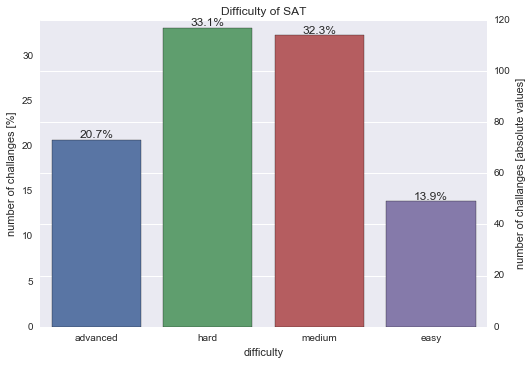

In [33]:
data=agg

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

##setup styles
sns.set(style="darkgrid")

ax = sns.countplot(data["difficulty"], order=difficulty_labels, palette="deep")
ax.set(xlabel='difficulty')
## add persentage axis
ax2=ax.twinx()
ax.yaxis.set_label_position("right")
ax.set_ylabel("number of challanges [absolute values]")
ax.yaxis.tick_right()

ax2.yaxis.set_label_position("left")
ax2.set_ylabel("number of challanges [%]")
ax2.set_ylim(0,100.*ax.get_ylim()[1]/len(data))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.yaxis.tick_left()
ax2.grid(None)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y), 
            ha='center', va='bottom')
##
plt.title("Difficulty of SAT")
plt.show()


ax.get_figure().savefig("sat_difficulty.png", format='png', dpi=300)

In [55]:
def createAGSrow(row, option_index):
    split_challange = row["challange"].split(" :: ")
    split_option = row["option_"+str(option_index)].split(" :: ")
    result = pd.DataFrame([[split_challange[0], split_challange[1], split_option[0], split_option[1], 5.0 if option_index==row["correct_id"] else 1.0 , "X", "X", "X", row["difficulty"]]])
    return result
    
## transform to ags format
sat_ags=pd.DataFrame()
ags=agg.drop("correct_sum",axis=1).drop("correct_count",axis=1).sort_values(by="id")
ags.set_index(["id"])
for index, row in ags.iterrows():
    for i in range(1,6):
        new_row=createAGSrow(row, i)
        sat_ags=sat_ags.append(new_row)

print(sat_ags)
sat_ags.to_csv("SAT_AGS_format.csv", index=False, sep=" ", header="False")

              0             1             2            3  4  5  6  7         8
0          lull         trust          balk    fortitude  1  X  X  X  advanced
0          lull         trust        betray      loyalty  1  X  X  X  advanced
0          lull         trust        cajole   compliance  5  X  X  X  advanced
0          lull         trust        hinder  destination  1  X  X  X  advanced
0          lull         trust        soothe      passion  1  X  X  X  advanced
0         swarm           bee        school         fish  5  X  X  X    medium
0         swarm           bee       venison         deer  1  X  X  X    medium
0         swarm           bee          oxen          cow  1  X  X  X    medium
0         swarm           bee          peak     mountain  1  X  X  X    medium
0         swarm           bee          skin         lion  1  X  X  X    medium
0        obtain         steal         quest       search  1  X  X  X  advanced
0        obtain         steal           ask  interro

In [35]:
ags.to_csv("SAT_with_difficulty.csv")

In [46]:
ags

,id,challange,option_1,option_2,option_3,option_4,option_5,correct_id,difficulty
0,0,lull :: trust,balk :: fortitude,betray :: loyalty,cajole :: compliance,hinder :: destination,soothe :: passion,3,advanced
1,100,swarm :: bee,school :: fish,venison :: deer,oxen :: cow,peak :: mountain,skin :: lion,1,medium
2,101,obtain :: steal,quest :: search,ask :: interrogate,testify :: perjure,buy :: sell,ask :: donate,3,advanced
3,102,inadvertent :: thought,ironic :: wrath,proud :: prize,artistic :: work,ungainly :: skill,prolific :: design,4,hard
4,103,parsimony :: philanthropy,carnal :: active,prejudice :: tolerance,generosity :: kindness,rivalry :: noise,liveliness :: patience,2,advanced
5,104,devotion :: obsession,ability :: skill,confidence :: conceit,intelligence :: capability,surprise :: horror,pleasure :: blessing,2,hard
6,105,bequest :: heir,gift :: recipient,huge :: weight,painting :: artist,payment :: donor,measure :: gauge,1,medium
7,106,prosaic :: epic,normal :: mean,powerful :: omnipotent,ephemeral :: eternal,octagon :: eight,beneficent :: strong,3,hard
8,107,corroded :: alloy,broken :: contract,written :: rule,outdated :: book,adjusted :: clock,corrupted :: morality,5,hard
9,108,depose :: king,eulogize :: hero,inaugurate :: mayor,promote :: general,unfrock :: minister,elect :: leader,4,hard
